# 第 5 章第 1 节-多项式回归、Pipeline 的用法

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

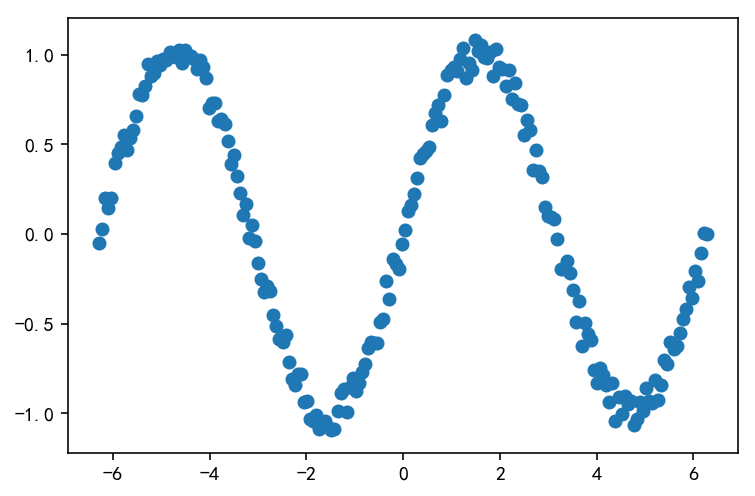

In [2]:
n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)

Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

plt.scatter(X, Y)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    # normalize 表示对数据进行归一化，这个参数的默认值是 False
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

这里的 score 是 $R^2$。

In [4]:
from sklearn.metrics import mean_squared_error

degrees = [2, 3, 5, 10]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({
        "model": model,
        "degree": d,
        "score": train_score,
        "mse": mse
    })
for r in results:
    print("degree: {:<2}; train score: {:.4f}; mean squared error: {:.4f}.".
          format(r["degree"], r["score"], r["mse"]))

degree: 2 ; train score: 0.1405; mean squared error: 0.4442.
degree: 3 ; train score: 0.2668; mean squared error: 0.3789.
degree: 5 ; train score: 0.8934; mean squared error: 0.0551.
degree: 10; train score: 0.9943; mean squared error: 0.0029.


可以看出，次数越高，$R^2$ 越高，损失函数越小。

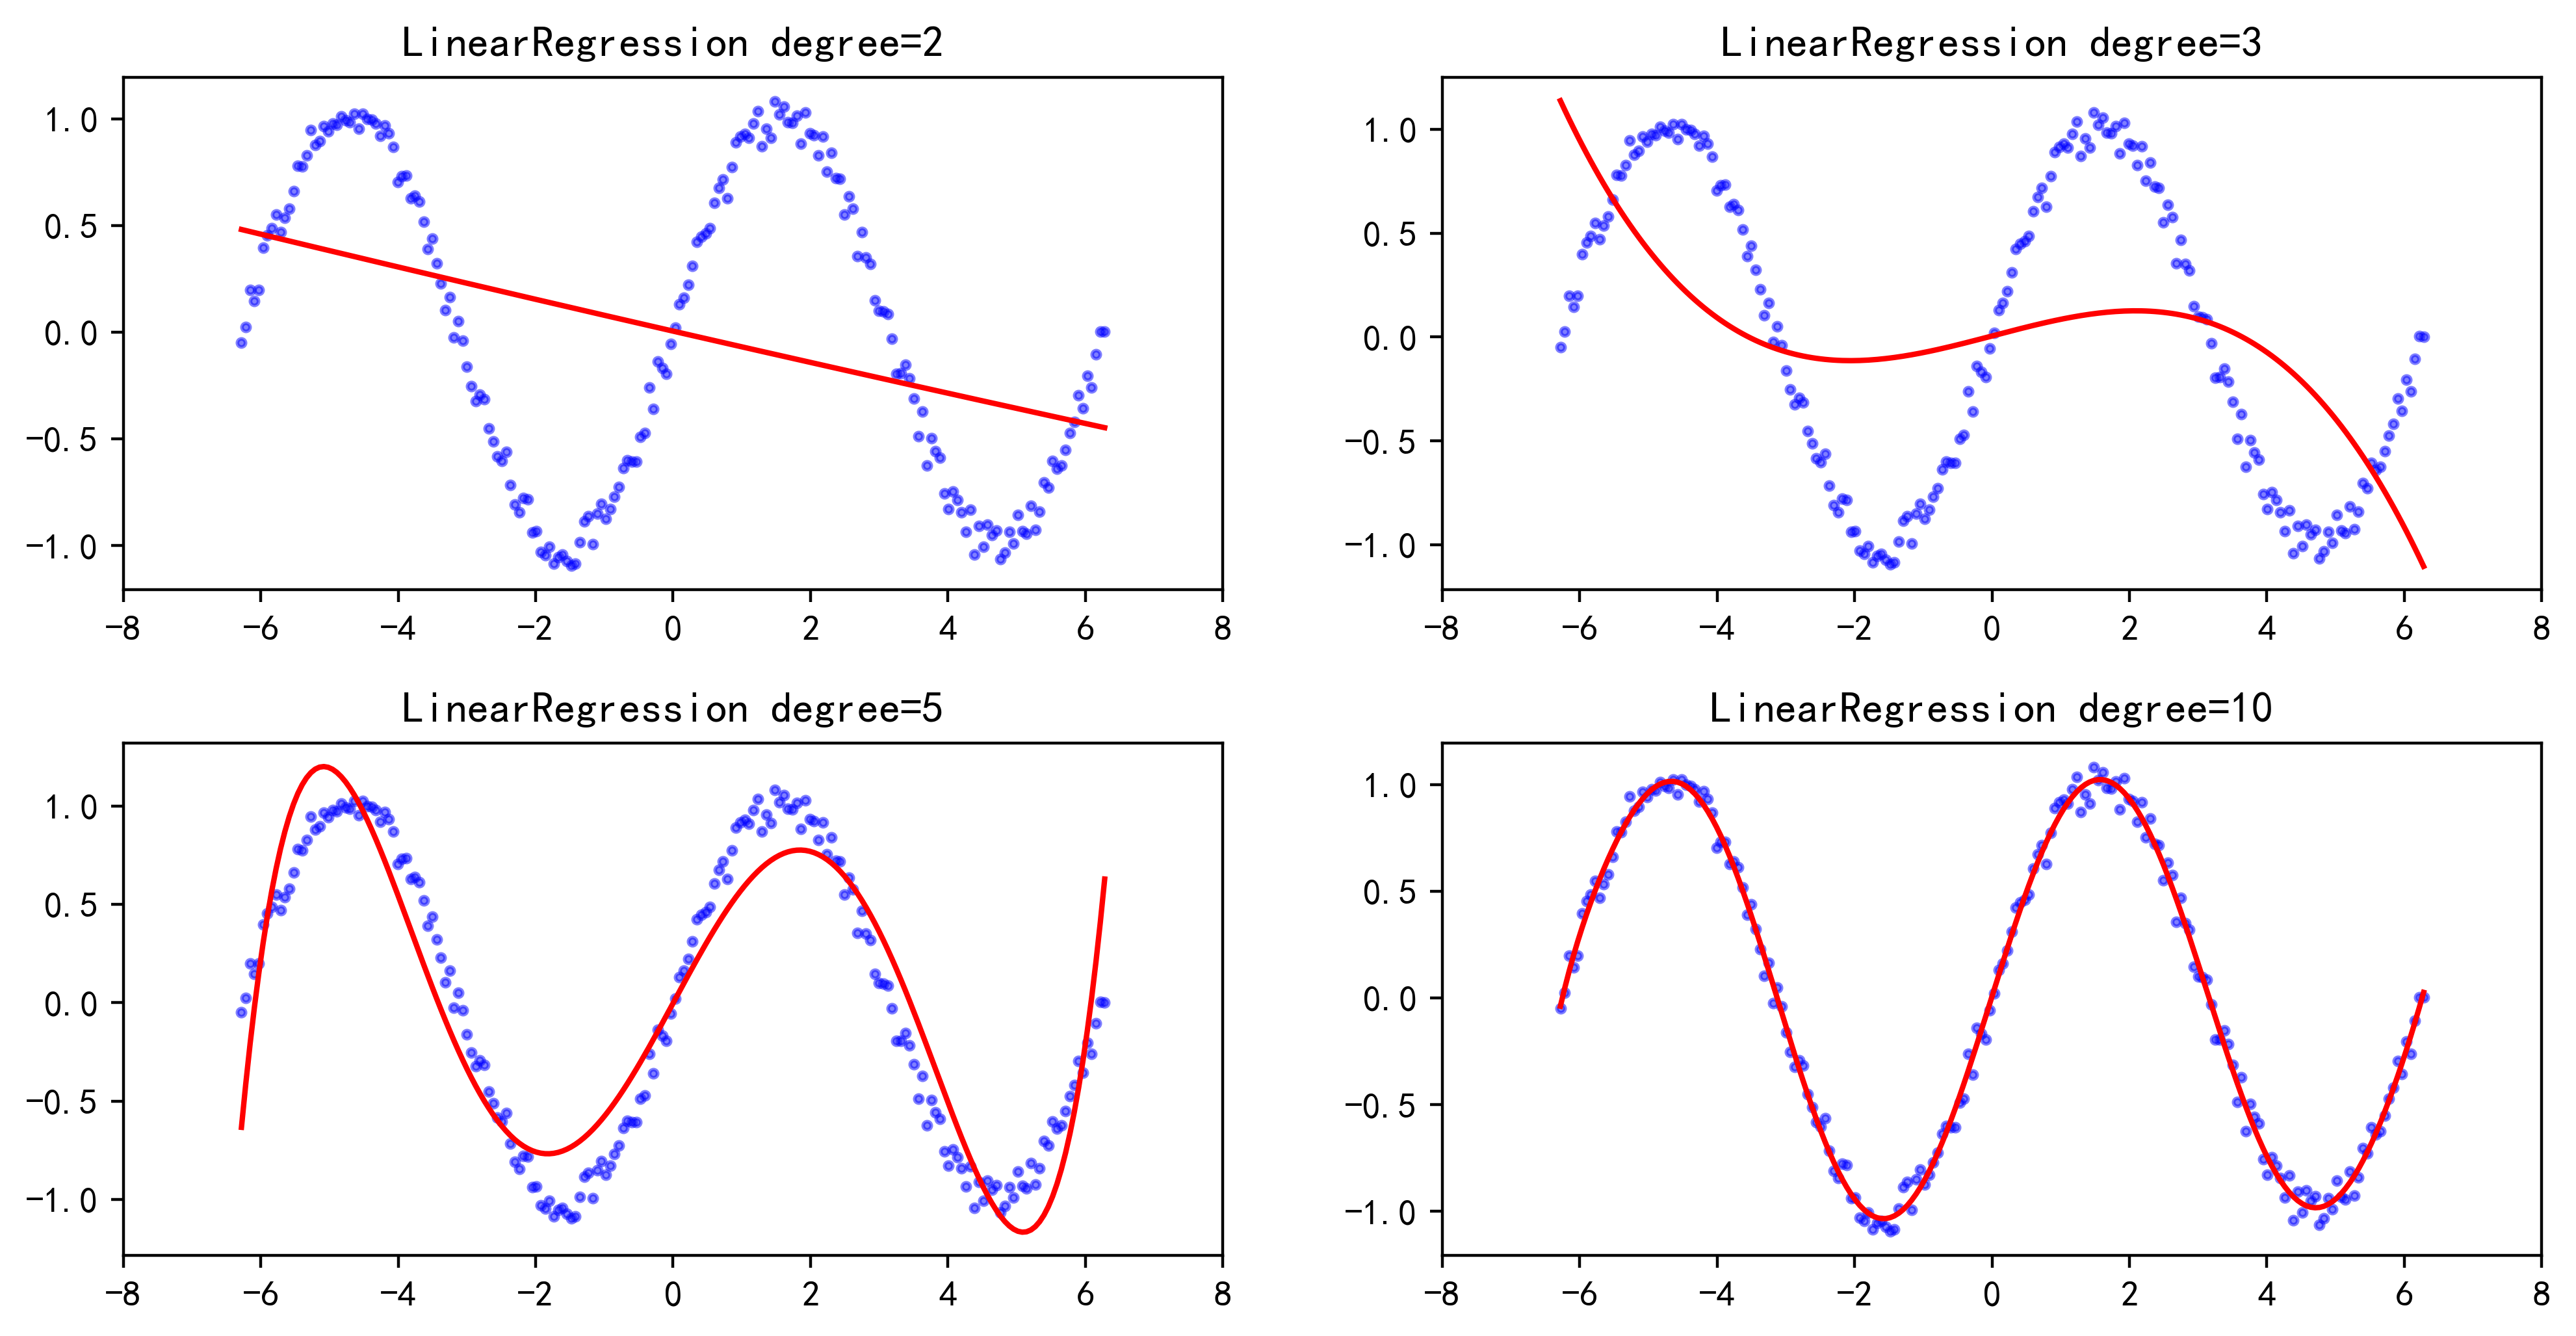

In [5]:
from matplotlib.figure import SubplotParams

plt.figure(figsize=(12, 6), dpi=200, subplotpars=SubplotParams(hspace=0.3))
for i, r in enumerate(results):
    fig = plt.subplot(2, 2, i + 1)
    plt.xlim(-8, 8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X, Y, s=5, c='b', alpha=0.5)
    plt.plot(X, r["model"].predict(X), 'r-')

次数越高，拟合的效果越好，但过拟合的风险也就越大。